In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
path = "/content/drive/MyDrive/EDA Assignment/BIKE DETAILS.csv"
df = pd.read_csv(path)
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


# **1. What is the range of selling prices in the dataset ?**

In [27]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"The range of selling prices is from {min_price} to {max_price}")

The range of selling prices is from 5000 to 760000


# **2. What is the median selling price for bikes in the dataset?**

In [28]:
median_price = df['selling_price'].median()
print(f"The median of selling price price for bikes is: {median_price}")

The median of selling price price for bikes is: 45000.0


# **3. What is the most common seller type?**


In [30]:
most_common_seller = df['seller_type'].mode() [0]
print(f"The most common type of seller type is: {most_common_seller}")

The most common type of seller type is: Individual


# **4. How many bikes have driven more than 50,000 kilometers?**


In [35]:
bikes_over_50k = len(df[df['km_driven'] > 50000])
print(f"The number of bikes that have driven more than 5o,000 kilometers is: {bikes_over_50k}")

The number of bikes that have driven more than 5o,000 kilometers is: 170


# **5. What is the average km_driven value for each ownership type?**

In [43]:
average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
average_km_driven_by_ownership

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


# **6. What proportion of bikes are from the year 2015 or older?**

In [10]:
bikes_2015_or_order = df[df['year'] <= 2015]
proportion = len(bikes_2015_or_order) / len(df)
print(f"The proportion of bikes from 2015 or older is: {proportion}")

The proportion of bikes from 2015 or older is: 0.5664467483506126


# **7. What is the trend of missing values across the dataset?**


                   Missing Values  Percentage
ex_showroom_price             435   40.999057
name                            0    0.000000
selling_price                   0    0.000000
year                            0    0.000000
seller_type                     0    0.000000
owner                           0    0.000000
km_driven                       0    0.000000


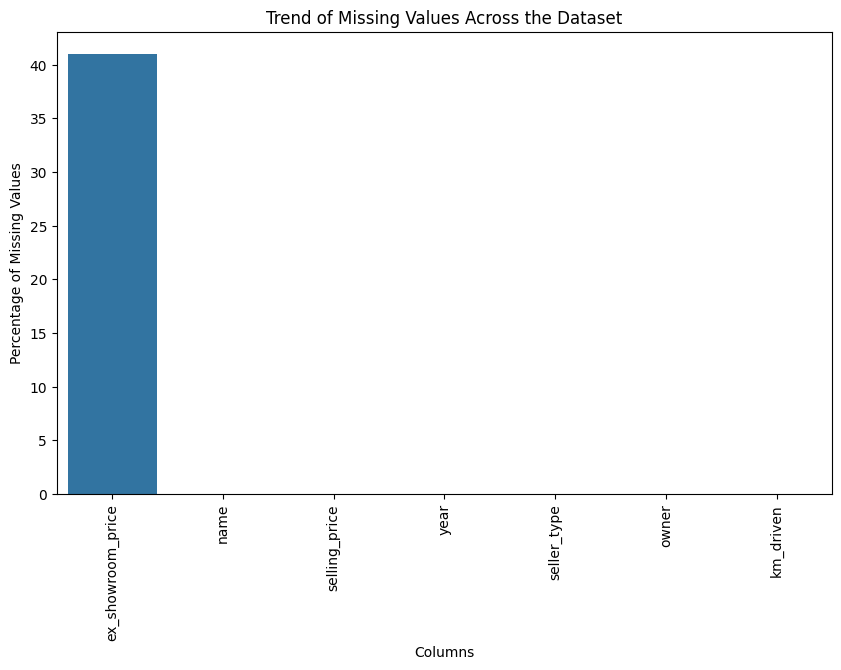

In [13]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Sort the DataFrame by the percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

# Print the missing data summary
print(missing_data)

# Visualize the trend of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y='Percentage', data=missing_data)
plt.xticks(rotation=90)
plt.title('Trend of Missing Values Across the Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

# **8. What is the highest ex_showroom_price recorded, and for which bike?**

In [14]:
highest_price = df['ex_showroom_price'].max()
bike_with_highest_price = df.loc[df['ex_showroom_price'] == highest_price,'name'].iloc[0]

print(f"The highest ex_showroom_price is: {highest_price}")
print(f"The bike with the highest ex_showroom_price_is: {bike_with_highest_price}")

The highest ex_showroom_price is: 1278000.0
The bike with the highest ex_showroom_price_is: Harley-Davidson Street Bob


# **9. What is the total number of bikes listed by each seller type?**

In [15]:
seller_type_counts = df['seller_type'].value_counts()
seller_type_counts

,count
seller_type,
Individual,1055
Dealer,6


# **10. What is the relationship between selling_price and km_driven for first-owner bikes?**

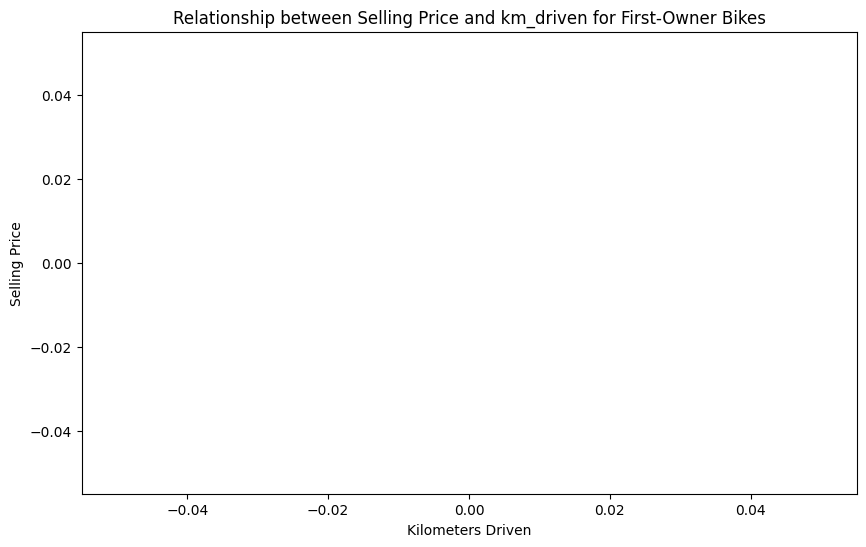

The correlation coefficient between selling price and km_driven for first-owner bikes is: nan


In [21]:
# Filter the DataFrame for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and km_driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

# Calculate the correlation coefficient
correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"The correlation coefficient between selling price and km_driven for first-owner bikes is: {correlation}")

# **11. Identify and remove outliers in the km_driven column using the IQR method.**

In [22]:
# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(outliers)}")

Number of outliers removed: 39


# **12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**

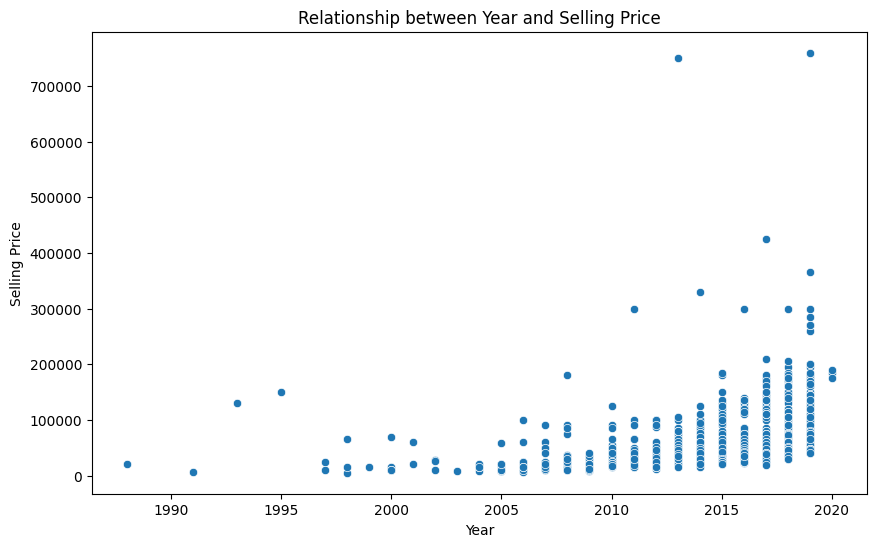

The correlation coefficient between year and selling price is: 0.40218840061474403


In [23]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Calculate the correlation coefficient
correlation = df['year'].corr(df['selling_price'])
print(f"The correlation coefficient between year and selling price is: {correlation}")

# **13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?**

In [24]:
# Calculate the age of each bike
current_year = 2023  # Assuming the current year is 2023
df['bike_age'] = current_year - df['year']

# Group the data by bike age and calculate the average selling price for each age group
average_selling_price_by_age = df.groupby('bike_age')['selling_price'].mean()

# Calculate the depreciation as the difference between the average selling price at different ages
depreciation = average_selling_price_by_age.diff()

# Print the average depreciation for each age
print(depreciation)

# Calculate the overall average depreciation
overall_average_depreciation = depreciation.mean()
print(f"\nThe overall average depreciation in selling price based on bike age is: {overall_average_depreciation}")

bike_age
3               NaN
4     -63643.821705
5     -32029.137582
6      -8765.637204
7     -20425.718151
8      -1969.018692
9      -7831.868132
10      2468.854433
11    -15388.586301
12       -92.678689
13     -3862.387978
14     -9525.476190
15     12021.428571
16     -9361.699507
17     -1547.586207
18     -6401.428571
19     -1878.571429
20     -7100.000000
21     12666.666667
22     19333.333333
23    -19166.666667
24     -5833.333333
25     13333.333333
26    -10833.333333
28    132500.000000
30    -20000.000000
32   -124000.000000
35     14000.000000
Name: selling_price, dtype: float64

The overall average depreciation in selling price based on bike age is: -6049.382716049383


# **14. Which bike names are priced significantly above the average price for their manufacturing year?**

In [25]:
# Calculate the average selling price for each year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average price back into the original DataFrame
df['average_price_for_year'] = df['year'].map(average_price_by_year)

# Identify bikes priced significantly above average (e.g., 2 standard deviations above)
std_dev_price = df['selling_price'].std()
df['price_difference'] = df['selling_price'] - df['average_price_for_year']
significantly_above_average = df[df['price_difference'] > 2 * std_dev_price]

# Print the names of the bikes
print(significantly_above_average['name'])

7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


# **15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

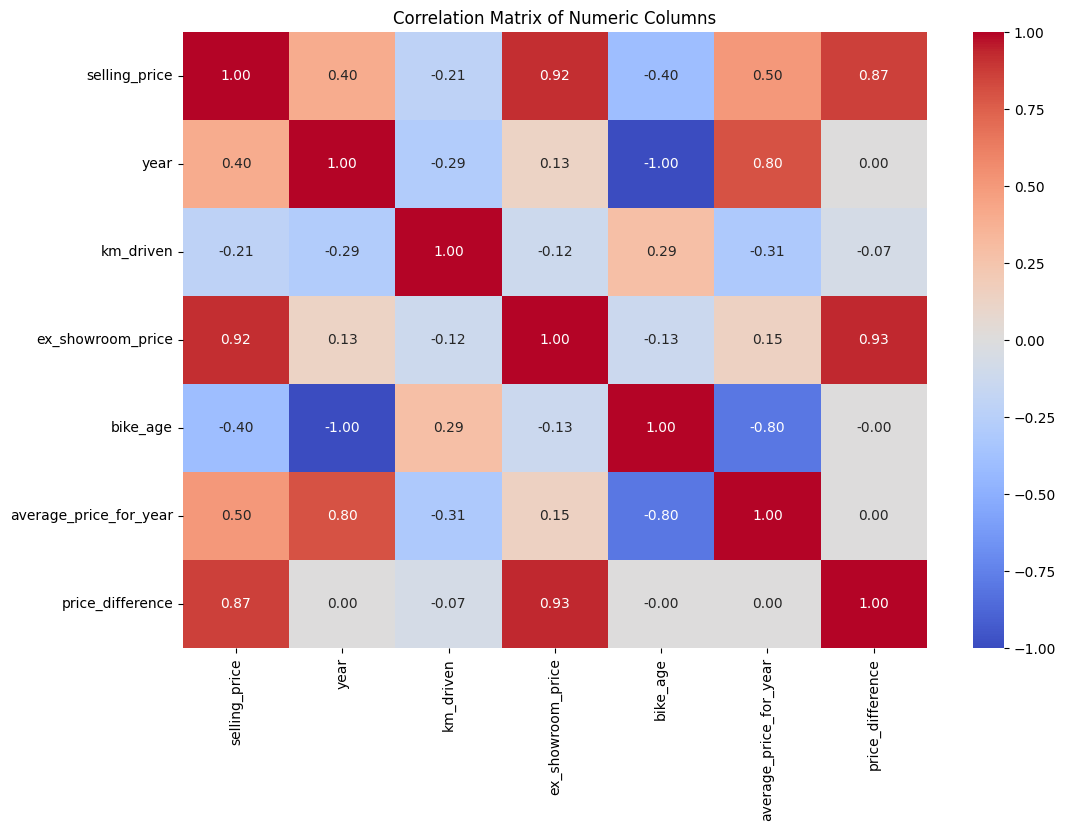

In [26]:
# Calculate the correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()